## Imports

In [1]:
import numpy as np

from keras.datasets import imdb, reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## The Sequential model

In [2]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

## Binary classificator

### Sigmoid

![Image](https://www.gstatic.com/education/formulas2/397133473/en/sigmoid_function.svg)

In [3]:
# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

### [Data set explanations](https://keras.io/api/datasets/imdb/)

In [4]:
data_train[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])],
      dtype=object)

In [5]:
target_train[:1]

array([1], dtype=int64)

In [6]:
# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(
    number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=3, # Number of epochs
                      verbose=1, # Print description after each epoch
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

Epoch 1/3
250/250 [==============================] - 2s 4ms/step - loss: 0.4337 - accuracy: 0.8060 - val_loss: 0.3348 - val_accuracy: 0.8577
Epoch 2/3
250/250 [==============================] - 1s 3ms/step - loss: 0.3216 - accuracy: 0.8659 - val_loss: 0.3279 - val_accuracy: 0.8606
Epoch 3/3
250/250 [==============================] - 1s 3ms/step - loss: 0.3105 - accuracy: 0.8702 - val_loss: 0.3364 - val_accuracy: 0.8554


## Multiclass Classifer

### Softmax

![Image](https://www.gstatic.com/education/formulas2/397133473/en/softmax_function.svg)

In [7]:
# Set the number of features we want
number_of_features = 5000

# Load feature and target data
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

In [8]:
data_train[:2]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 2, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])],
      dtype=object)

### [Data set explanations](https://keras.io/api/datasets/reuters/)

In [9]:
# Convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# One-hot encode target vector to create a target matrix
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100,
                         activation="relu",
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=100, activation="relu"))

# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=46, activation="softmax"))

# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target
                      epochs=3, # Three epochs
                      verbose=1, # Print description after each epoch
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

Epoch 1/3
90/90 [==============================] - 1s 10ms/step - loss: 1.5437 - accuracy: 0.6608 - val_loss: 1.1370 - val_accuracy: 0.7511
Epoch 2/3
90/90 [==============================] - 1s 7ms/step - loss: 0.7947 - accuracy: 0.8238 - val_loss: 0.9451 - val_accuracy: 0.7907
Epoch 3/3
90/90 [==============================] - 1s 7ms/step - loss: 0.5098 - accuracy: 0.8886 - val_loss: 0.8936 - val_accuracy: 0.8019


## Regressor

In [10]:
# Generate features matrix and target vector
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# Divide our data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32,
                         activation="relu",
                         input_shape=(features_train.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation="relu"))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

# Compile neural network
network.compile(loss="mse", # Mean squared error
                optimizer="RMSprop", # Optimization algorithm
                metrics=["mse"]) # Mean squared error

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=10, # Number of epochs
                      verbose=1, # Print description after each epoch
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

Epoch 1/10
67/67 [==============================] - 1s 4ms/step - loss: 17305.6016 - mse: 17305.6016 - val_loss: 17662.3477 - val_mse: 17662.3477
Epoch 2/10
67/67 [==============================] - 0s 2ms/step - loss: 16430.7324 - mse: 16430.7324 - val_loss: 16363.5166 - val_mse: 16363.5166
Epoch 3/10
67/67 [==============================] - 0s 2ms/step - loss: 14772.9131 - mse: 14772.9131 - val_loss: 14205.5566 - val_mse: 14205.5566
Epoch 4/10
67/67 [==============================] - 0s 2ms/step - loss: 12265.0879 - mse: 12265.0879 - val_loss: 11181.5986 - val_mse: 11181.5986
Epoch 5/10
67/67 [==============================] - 0s 2ms/step - loss: 9089.8623 - mse: 9089.8623 - val_loss: 7695.4756 - val_mse: 7695.4756
Epoch 6/10
67/67 [==============================] - 0s 2ms/step - loss: 5796.4253 - mse: 5796.4253 - val_loss: 4496.1040 - val_mse: 4496.1040
Epoch 7/10
67/67 [==============================] - 0s 3ms/step - loss: 3171.3726 - mse: 3171.3723 - val_loss: 2318.0640 - val_mse: 

## Predictions

In [11]:
# Set the number of features we want
number_of_features = 5000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Convert movie review data to one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(
    number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=20, # Number of epochs
                      verbose=1, # Print description after each epoch
                      batch_size=500, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

# Predict classes of test set
predicted_target = network.predict(features_test)

Epoch 1/20
50/50 [==============================] - 2s 25ms/step - loss: 0.4504 - accuracy: 0.8156 - val_loss: 0.3341 - val_accuracy: 0.8771
Epoch 2/20
50/50 [==============================] - 1s 14ms/step - loss: 0.2788 - accuracy: 0.8973 - val_loss: 0.2881 - val_accuracy: 0.8859
Epoch 3/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2304 - accuracy: 0.9122 - val_loss: 0.2830 - val_accuracy: 0.8858
Epoch 4/20
50/50 [==============================] - 1s 15ms/step - loss: 0.2086 - accuracy: 0.9226 - val_loss: 0.2927 - val_accuracy: 0.8818
Epoch 5/20
50/50 [==============================] - 1s 15ms/step - loss: 0.1926 - accuracy: 0.9256 - val_loss: 0.3009 - val_accuracy: 0.8798
Epoch 6/20
50/50 [==============================] - 1s 15ms/step - loss: 0.1827 - accuracy: 0.9310 - val_loss: 0.3193 - val_accuracy: 0.8767
Epoch 7/20
50/50 [==============================] - 1s 13ms/step - loss: 0.1735 - accuracy: 0.9351 - val_loss: 0.3451 - val_accuracy: 0.8688
Epoch 8/20
50

In [12]:
predicted_target[:10]

array([[3.7076235e-02],
       [9.9999928e-01],
       [8.5622764e-01],
       [9.9787629e-01],
       [9.9548900e-01],
       [7.5881147e-01],
       [9.9999928e-01],
       [2.8821826e-04],
       [9.9909359e-01],
       [9.9998605e-01]], dtype=float32)

## Visualize Training History

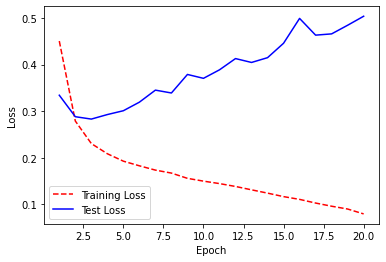

In [13]:
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

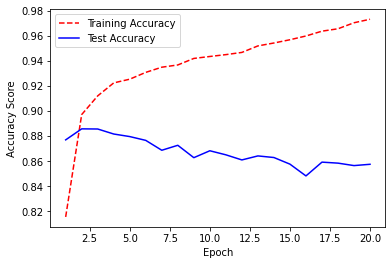

In [14]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

### L2 regularization

In [15]:
#L2 regularization sets up in the first layer

# # Add fully connected layer with a ReLU activation function network.add(layers.Dense(units=16,
#                          activation="relu",
#                          kernel_regularizer=regularizers.l2(0.01),
#                          input_shape=(number_of_features,)))

### Early Stopping

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

#network.compile(callbacks=callbacks)

### Dropouts

In [17]:
# Add a dropout layer for input layer
#network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
#network.add(layers.Dense(units=16, activation="relu"))
# Add a dropout layer for previous hidden layer
#network.add(layers.Dropout(0.5))

## Saving

In [18]:
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

## Cross-val and Grid search

In [19]:
# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# Create function returning a compiled network
def create_network(optimizer="rmsprop"):
    # Start neural network
    network = models.Sequential()
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu", input_shape=(
        number_of_features,)))
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu"))
    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation="sigmoid"))
    # Compile neural network
    network.compile(loss="binary_crossentropy", # Cross-entropy
                    optimizer="rmsprop", # Root Mean Square Propagation
                    metrics=["accuracy"]) # Accuracy performance metric
    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=2)

# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, features, target, cv=3)

Epoch 1/10
67/67 - 1s - loss: 0.7084 - accuracy: 0.5327
Epoch 2/10
67/67 - 0s - loss: 0.6655 - accuracy: 0.5981
Epoch 3/10
67/67 - 0s - loss: 0.6324 - accuracy: 0.6451
Epoch 4/10
67/67 - 0s - loss: 0.5917 - accuracy: 0.6850
Epoch 5/10
67/67 - 0s - loss: 0.5450 - accuracy: 0.7255
Epoch 6/10
67/67 - 0s - loss: 0.4886 - accuracy: 0.7751
Epoch 7/10
67/67 - 0s - loss: 0.4206 - accuracy: 0.8264
Epoch 8/10
67/67 - 0s - loss: 0.3456 - accuracy: 0.8725
Epoch 9/10
67/67 - 0s - loss: 0.2804 - accuracy: 0.9005
Epoch 10/10
67/67 - 0s - loss: 0.2354 - accuracy: 0.9185
34/34 - 0s - loss: 0.2635 - accuracy: 0.9028
Epoch 1/10
67/67 - 1s - loss: 0.7087 - accuracy: 0.5023
Epoch 2/10
67/67 - 0s - loss: 0.6785 - accuracy: 0.5658
Epoch 3/10
67/67 - 0s - loss: 0.6540 - accuracy: 0.6168
Epoch 4/10
67/67 - 0s - loss: 0.6206 - accuracy: 0.6588
Epoch 5/10
67/67 - 0s - loss: 0.5766 - accuracy: 0.7107
Epoch 6/10
67/67 - 0s - loss: 0.5195 - accuracy: 0.7597
Epoch 7/10
67/67 - 0s - loss: 0.4521 - accuracy: 0.8101
Ep

array([0.90281945, 0.90039003, 0.79747975])

### Grid

In [20]:
from sklearn.model_selection import GridSearchCV

# Create hyperparameter space
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)
# Fit grid search
grid_result = grid.fit(features, target)

Epoch 1/5
1600/1600 - 2s - loss: 0.6098 - accuracy: 0.6459
Epoch 2/5
1600/1600 - 1s - loss: 0.3784 - accuracy: 0.8350
Epoch 3/5
1600/1600 - 1s - loss: 0.2143 - accuracy: 0.9230
Epoch 4/5
1600/1600 - 1s - loss: 0.1766 - accuracy: 0.9416
Epoch 5/5
1600/1600 - 1s - loss: 0.1616 - accuracy: 0.9496
400/400 - 0s - loss: 0.1825 - accuracy: 0.9300
Epoch 1/5
1600/1600 - 2s - loss: 0.6008 - accuracy: 0.6457
Epoch 2/5
1600/1600 - 1s - loss: 0.3028 - accuracy: 0.8804
Epoch 3/5
1600/1600 - 1s - loss: 0.1878 - accuracy: 0.9361
Epoch 4/5
1600/1600 - 1s - loss: 0.1676 - accuracy: 0.9457
Epoch 5/5
1600/1600 - 1s - loss: 0.1557 - accuracy: 0.9514
400/400 - 0s - loss: 0.2093 - accuracy: 0.9350
Epoch 1/5
1600/1600 - 2s - loss: 0.5964 - accuracy: 0.6701
Epoch 2/5
1600/1600 - 1s - loss: 0.2597 - accuracy: 0.9013
Epoch 3/5
1600/1600 - 1s - loss: 0.1795 - accuracy: 0.9399
Epoch 4/5
1600/1600 - 1s - loss: 0.1576 - accuracy: 0.9471
Epoch 5/5
1600/1600 - 1s - loss: 0.1481 - accuracy: 0.9523
400/400 - 0s - loss: 

Epoch 5/10
1600/1600 - 1s - loss: 0.1421 - accuracy: 0.9515
Epoch 6/10
1600/1600 - 1s - loss: 0.1364 - accuracy: 0.9570
Epoch 7/10
1600/1600 - 1s - loss: 0.1290 - accuracy: 0.9605
Epoch 8/10
1600/1600 - 1s - loss: 0.1196 - accuracy: 0.9629
Epoch 9/10
1600/1600 - 1s - loss: 0.1179 - accuracy: 0.9638
Epoch 10/10
1600/1600 - 1s - loss: 0.1136 - accuracy: 0.9665
400/400 - 0s - loss: 0.2619 - accuracy: 0.9280
Epoch 1/10
1600/1600 - 2s - loss: 0.5969 - accuracy: 0.6645
Epoch 2/10
1600/1600 - 1s - loss: 0.2819 - accuracy: 0.8900
Epoch 3/10
1600/1600 - 1s - loss: 0.1765 - accuracy: 0.9381
Epoch 4/10
1600/1600 - 1s - loss: 0.1565 - accuracy: 0.9505
Epoch 5/10
1600/1600 - 1s - loss: 0.1432 - accuracy: 0.9542
Epoch 6/10
1600/1600 - 1s - loss: 0.1363 - accuracy: 0.9570
Epoch 7/10
1600/1600 - 1s - loss: 0.1309 - accuracy: 0.9584
Epoch 8/10
1600/1600 - 1s - loss: 0.1283 - accuracy: 0.9628
Epoch 9/10
1600/1600 - 1s - loss: 0.1200 - accuracy: 0.9659
Epoch 10/10
1600/1600 - 1s - loss: 0.1177 - accuracy

Epoch 2/10
800/800 - 1s - loss: 0.4051 - accuracy: 0.8191
Epoch 3/10
800/800 - 1s - loss: 0.2186 - accuracy: 0.9175
Epoch 4/10
800/800 - 1s - loss: 0.1724 - accuracy: 0.9394
Epoch 5/10
800/800 - 1s - loss: 0.1550 - accuracy: 0.9498
Epoch 6/10
800/800 - 1s - loss: 0.1450 - accuracy: 0.9542
Epoch 7/10
800/800 - 1s - loss: 0.1371 - accuracy: 0.9560
Epoch 8/10
800/800 - 1s - loss: 0.1293 - accuracy: 0.9580
Epoch 9/10
800/800 - 1s - loss: 0.1223 - accuracy: 0.9631
Epoch 10/10
800/800 - 1s - loss: 0.1182 - accuracy: 0.9639
200/200 - 0s - loss: 0.1821 - accuracy: 0.9325
Epoch 1/10
800/800 - 1s - loss: 0.6511 - accuracy: 0.5946
Epoch 2/10
800/800 - 1s - loss: 0.4571 - accuracy: 0.7778
Epoch 3/10
800/800 - 1s - loss: 0.2489 - accuracy: 0.9096
Epoch 4/10
800/800 - 1s - loss: 0.1809 - accuracy: 0.9356
Epoch 5/10
800/800 - 1s - loss: 0.1597 - accuracy: 0.9449
Epoch 6/10
800/800 - 1s - loss: 0.1474 - accuracy: 0.9510
Epoch 7/10
800/800 - 1s - loss: 0.1371 - accuracy: 0.9546
Epoch 8/10
800/800 - 1s 

Epoch 3/10
80/80 - 0s - loss: 0.6039 - accuracy: 0.6770
Epoch 4/10
80/80 - 0s - loss: 0.5520 - accuracy: 0.7230
Epoch 5/10
80/80 - 0s - loss: 0.4954 - accuracy: 0.7681
Epoch 6/10
80/80 - 0s - loss: 0.4331 - accuracy: 0.8144
Epoch 7/10
80/80 - 0s - loss: 0.3624 - accuracy: 0.8569
Epoch 8/10
80/80 - 0s - loss: 0.2938 - accuracy: 0.8932
Epoch 9/10
80/80 - 0s - loss: 0.2392 - accuracy: 0.9181
Epoch 10/10
80/80 - 0s - loss: 0.2040 - accuracy: 0.9290
20/20 - 0s - loss: 0.2374 - accuracy: 0.9015
Epoch 1/10
80/80 - 1s - loss: 0.6947 - accuracy: 0.5426
Epoch 2/10
80/80 - 0s - loss: 0.6602 - accuracy: 0.6008
Epoch 3/10
80/80 - 0s - loss: 0.6210 - accuracy: 0.6560
Epoch 4/10
80/80 - 0s - loss: 0.5678 - accuracy: 0.7017
Epoch 5/10
80/80 - 0s - loss: 0.5039 - accuracy: 0.7516
Epoch 6/10
80/80 - 0s - loss: 0.4283 - accuracy: 0.8121
Epoch 7/10
80/80 - 0s - loss: 0.3436 - accuracy: 0.8669
Epoch 8/10
80/80 - 0s - loss: 0.2711 - accuracy: 0.9025
Epoch 9/10
80/80 - 0s - loss: 0.2207 - accuracy: 0.9226
Ep

In [21]:
grid_result.best_params_

{'batch_size': 5, 'epochs': 5, 'optimizer': 'adam'}

## Visualize network

In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

In [3]:
# Visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


AttributeError: 'NoneType' object has no attribute 'create'

## Convolutional neural network

In [13]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Set that the color channel value will be first
K.set_image_data_format("channels_last")

# Set seed
np.random.seed(0)

# Set image information
channels = 1
height = 28
width = 28

# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], height, width, channels)

# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], height, width, channels)

# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

# Start neural network
network = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(width, height, channels),
                   activation='relu'))

# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))

# Add dropout layer
network.add(Dropout(0.5))

# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target
                      epochs=10, # Number of epochs
                      verbose=2, # Don't print description after each epoch
                      batch_size=1000, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Data for evaluation

Epoch 1/10
60/60 - 34s - loss: 0.6231 - accuracy: 0.8063 - val_loss: 0.1564 - val_accuracy: 0.9561
Epoch 2/10
60/60 - 31s - loss: 0.1930 - accuracy: 0.9434 - val_loss: 0.0902 - val_accuracy: 0.9724
Epoch 3/10
60/60 - 31s - loss: 0.1272 - accuracy: 0.9632 - val_loss: 0.0619 - val_accuracy: 0.9799
Epoch 4/10
60/60 - 31s - loss: 0.1019 - accuracy: 0.9696 - val_loss: 0.0562 - val_accuracy: 0.9824
Epoch 5/10
60/60 - 31s - loss: 0.0851 - accuracy: 0.9744 - val_loss: 0.0496 - val_accuracy: 0.9836
Epoch 6/10
60/60 - 32s - loss: 0.0754 - accuracy: 0.9780 - val_loss: 0.0396 - val_accuracy: 0.9869
Epoch 7/10
60/60 - 33s - loss: 0.0666 - accuracy: 0.9799 - val_loss: 0.0393 - val_accuracy: 0.9865
Epoch 8/10
60/60 - 32s - loss: 0.0604 - accuracy: 0.9815 - val_loss: 0.0342 - val_accuracy: 0.9885
Epoch 9/10
60/60 - 33s - loss: 0.0562 - accuracy: 0.9832 - val_loss: 0.0353 - val_accuracy: 0.9883
Epoch 10/10
60/60 - 35s - loss: 0.0523 - accuracy: 0.9843 - val_loss: 0.0334 - val_accuracy: 0.9889


In [12]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,182,730
Trainable params: 1,182,730
Non-trainable params: 0
_________________________________________________________________


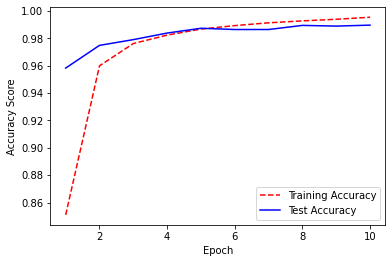

In [11]:
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

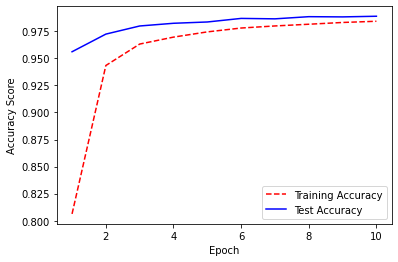

In [14]:
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

### Image Augmentation

In [ ]:
# Load library
from keras.preprocessing.image import ImageDataGenerator

# Create image augmentation
augmentation = ImageDataGenerator(featurewise_center=True, # Apply ZCA whitening
                                  zoom_range=0.3, # Randomly zoom in on images
                                  width_shift_range=0.2, # Randomly shift images
                                  horizontal_flip=True, # Randomly flip images
                                  rotation_range=90) # Randomly rotate

# Process all images from the directory 'raw/images'
# Returns generator object
augment_images = augmentation.flow_from_directory("raw/images", # Image folder
                                                  batch_size=32, # Batch size
                                                  class_mode="binary", # Classes
                                                  save_to_dir="processed/images")

# Train neural network
network.fit_generator(augment_images,
                      #Number of times to call the generator for each epoch
                      steps_per_epoch=2000,
                      # Number of epochs
                      epochs=5,
                      # Test data generator
                      validation_data=augment_images_test,
                      # Number of items to call the generator
                      # for each test epoch
                      validation_steps=800